In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

In [2]:
def plotData(data, x, y, title, xlabel, ylabel, save_path):
    plt.scatter(data[x], data[y])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(save_path)
    plt.show()
def pressureToAltitude(pressure):
    StandardSeaLevelPressure = 874.0269148666753 #20 August 2024 Fort Summer, NM
    return 44330 * (1 - (pressure/StandardSeaLevelPressure)**(1/5.255))
def millisecondsToSeconds(milliseconds):
    return milliseconds/1000    
def smoothData(data, column, threshold):
    data['diff'] = data[column].diff().abs()
    data = data[data['diff'] < threshold]
    data.drop(columns=['diff'], inplace=True)
    return data
def thresholdData(data, column, threshold):
    data.loc[data[column] > threshold, column] = threshold
    return data

In [3]:
def combineCSV(inputFolder,outputFile):
    combinedCSV = pd.DataFrame()
    i=0
    cummulativeTime = 0
    cummulatives = []
    while True:
        filePath = os.path.join(inputFolder, f'data{i}.csv')
        if not os.path.exists(filePath):
            break
        df = pd.read_csv(filePath)
        
        df['Time'] = df['Time'] + cummulativeTime
        cummulativeTime = df['Time'].iloc[-1]
        cummulatives.append(cummulativeTime)
        combinedCSV = pd.concat([combinedCSV,df],ignore_index=True)
        i+=1
    combinedCSV.to_csv(outputFile, index=False)
    return cummulatives
combineCSV('data','output.csv')

[np.int64(32728),
 np.int64(77926),
 np.int64(540491),
 np.int64(45961325),
 np.int64(45973772),
 np.int64(46048146),
 np.int64(46093700),
 np.int64(48435358),
 np.int64(48597280),
 np.int64(48717575),
 np.int64(61664007),
 np.int64(61719206),
 np.int64(98650827),
 np.int64(111829313)]

/var/folders/65/8hpcy1wd5m565_60gpnz9nf00000gn/T/ipykernel_12827/1890014338.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['diff'], inplace=True)
/var/folders/65/8hpcy1wd5m565_60gpnz9nf00000gn/T/ipykernel_12827/1890014338.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['diff'], inplace=True)
/var/folders/65/8hpcy1wd5m565_60gpnz9nf00000gn/T/ipykernel_12827/1890014338.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

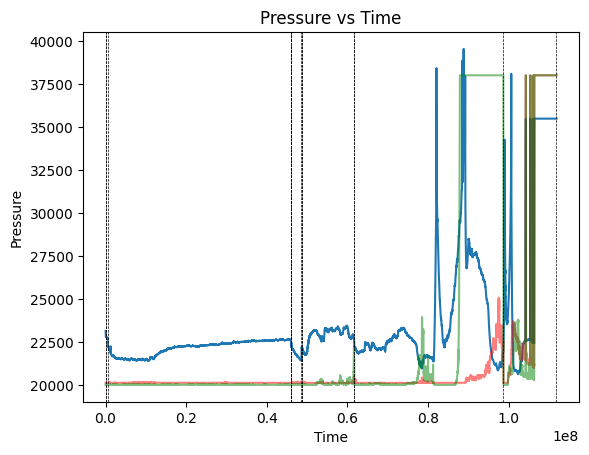

In [4]:
vertLines = combineCSV('data','output.csv')
df = pd.read_csv('output.csv')
df['Pressure'] = df['Pressure'].apply(pressureToAltitude)

# Vertical Shift & Scalar for CO2 and TVOC
verticalShift = 20000
scalar = 0.3

df = smoothData(df, 'Pressure', 1000)
df = smoothData(df, 'CO2 equivelent', 100)
df = smoothData(df, 'TVOC', 100)

df = thresholdData(df, 'TVOC', 60000)
df = thresholdData(df, 'CO2 equivelent', 60000)

plt.plot(df['Time'],df['Pressure'])
plt.plot(df['Time'],(df['CO2 equivelent'])*scalar+verticalShift, color='red', alpha=0.5)
plt.plot(df['Time'],(df['TVOC'])*scalar+verticalShift, color='green', alpha=0.5)
plt.title('Pressure vs Time')
plt.xlabel('Time')
plt.ylabel('Pressure')
for line in vertLines:
    plt.axvline(x=line, color='black', linestyle='--', linewidth=0.5)
plt.show()